In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import matplotlib
import matplotlib.pyplot as pp
import pandas.plotting
from IPython import display
from ipywidgets  import interact, widgets
%matplotlib inline
import re
import mailbox
import csv

In [2]:
data = pd.read_csv("Whickham.csv")

In [3]:
data.head()

,Unnamed: 0,outcome,smoker,age
0,1,Alive,Yes,23
1,2,Alive,Yes,18
2,3,Dead,Yes,71
3,4,Alive,No,67
4,5,Alive,No,64


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1314 non-null   int64 
 1   outcome     1314 non-null   object
 2   smoker      1314 non-null   object
 3   age         1314 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 41.2+ KB


In [5]:
data.isna().sum()

Unnamed: 0    0
outcome       0
smoker        0
age           0
dtype: int64

In [6]:
pd.DataFrame(data.smoker.value_counts())

,smoker
No,732
Yes,582


In [7]:
pd.DataFrame(data.age.value_counts())

,age
28,32
33,32
32,30
31,30
25,28
...,...
76,7
79,6
81,6
83,4


In [8]:
pd.DataFrame(data.outcome.value_counts())

,outcome
Alive,945
Dead,369


In [9]:
pd.DataFrame(data.outcome.value_counts(normalize = True))

,outcome
Alive,0.719178
Dead,0.280822


In [10]:
data_smoker = data.groupby("smoker").outcome.value_counts()
data_smoker

smoker  outcome
No      Alive      502
        Dead       230
Yes     Alive      443
        Dead       139
Name: outcome, dtype: int64

In [11]:
# The same above once we use normalize as true we get the values in fractions
data_smoker = data.groupby("smoker").outcome.value_counts(normalize = True)
data_smoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [12]:
data_smoker.index

MultiIndex([( 'No', 'Alive'),
            ( 'No',  'Dead'),
            ('Yes', 'Alive'),
            ('Yes',  'Dead')],
           names=['smoker', 'outcome'])

In [13]:
data_smoker.unstack()

outcome,Alive,Dead
smoker,,
No,0.685792,0.314208
Yes,0.761168,0.238832


In [14]:
data["agegroup"] = pd.cut(data.age,[0,30,40,50,60,],labels=['0-30','30-40','40-50','50-60'])

In [15]:
data["agegroup"].head()

0    0-30
1    0-30
2     NaN
3     NaN
4     NaN
Name: agegroup, dtype: category
Categories (4, object): ['0-30' < '30-40' < '40-50' < '50-60']

In [16]:
data["age"].head()

0    23
1    18
2    71
3    67
4    64
Name: age, dtype: int64

In [17]:
data_age = data.groupby(['agegroup','smoker']).outcome.value_counts(normalize = True)
data_age

agegroup  smoker  outcome
0-30      No      Alive      0.981818
                  Dead       0.018182
          Yes     Alive      0.975610
                  Dead       0.024390
30-40     No      Alive      0.955224
                  Dead       0.044776
          Yes     Alive      0.940678
                  Dead       0.059322
40-50     No      Alive      0.867470
                  Dead       0.132530
          Yes     Alive      0.828125
                  Dead       0.171875
50-60     No      Alive      0.722222
                  Dead       0.277778
          Yes     Alive      0.616071
                  Dead       0.383929
Name: outcome, dtype: float64

In [18]:
data_age.unstack()

outcome             Alive      Dead
agegroup smoker                    
0-30     No      0.981818  0.018182
         Yes     0.975610  0.024390
30-40    No      0.955224  0.044776
         Yes     0.940678  0.059322
40-50    No      0.867470  0.132530
         Yes     0.828125  0.171875
50-60    No      0.722222  0.277778
         Yes     0.616071  0.383929

In [19]:
# Dropping dead column
data_age.unstack().drop("Dead",axis=1)

outcome             Alive
agegroup smoker          
0-30     No      0.981818
         Yes     0.975610
30-40    No      0.955224
         Yes     0.940678
40-50    No      0.867470
         Yes     0.828125
50-60    No      0.722222
         Yes     0.616071

<AxesSubplot:>

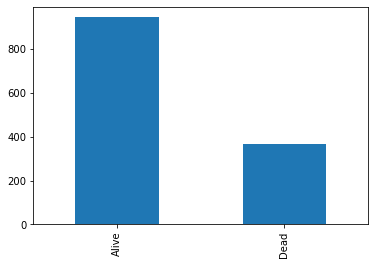

In [20]:
data.outcome.value_counts().plot(kind="bar")

Text(0.5, 1.0, 'smoker')

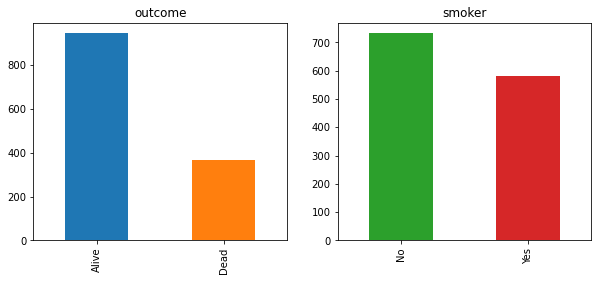

In [23]:
 # using subplot
pp.figure(figsize=(10,4))

pp.subplot(1,2,1);data.outcome.value_counts().plot(kind='bar', color=['C0', 'C1']); pp.title('outcome')
pp.subplot(1,2,2);data.smoker.value_counts().plot(kind='bar', color=['C2', 'C3']); pp.title('smoker')

Text(0.5, 1.0, 'smoker')

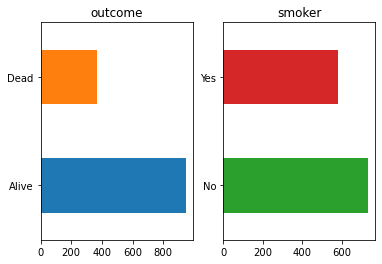

In [24]:
pp.subplot(1,2,1);data.outcome.value_counts().plot(kind='barh', color=['C0', 'C1']); pp.title('outcome')
pp.subplot(1,2,2);data.smoker.value_counts().plot(kind='barh', color=['C2', 'C3']); pp.title('smoker')

Text(0.5, 1.0, 'smoker')

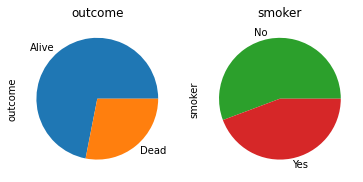

In [25]:
pp.subplot(1,2,1);data.outcome.value_counts().plot(kind='pie', colors=['C0', 'C1']); pp.title('outcome')
pp.subplot(1,2,2);data.smoker.value_counts().plot(kind='pie', colors=['C2', 'C3']); pp.title('smoker')

In [26]:
data_smoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

<AxesSubplot:xlabel='smoker,outcome'>

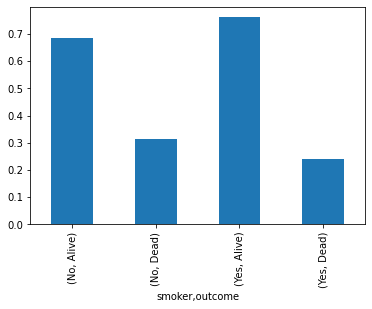

In [28]:
data_smoker.plot(kind='bar')

<AxesSubplot:xlabel='smoker'>

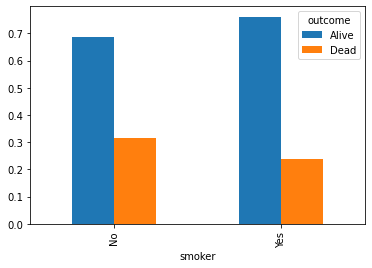

In [29]:
data_smoker.unstack().plot(kind='bar')

<AxesSubplot:xlabel='agegroup,smoker'>

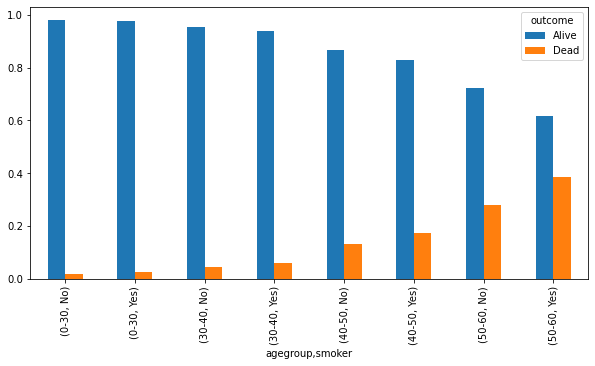

In [31]:
data_age.unstack().plot(kind='bar',figsize=(10,5))